## Setting up for Analysis

Importing libraries needed for analyzing and clustering data to prepare for further investigation.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

## Getting to Know the Data

Loading data and taking a peek at the initial rows to understand its structure and content better.

In [3]:
df = pd.read_csv("./Q1_data.csv")
df.head(10)

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10
5,5,BNB,BNB,2023-08-19T23:59:59.999Z,2023-08-19T17:00:00.000Z,2023-08-19T07:20:00.000Z,216.144483,216.999447,218.997591,214.328844,3.338578e+10,4.772674e+08
6,6,BNB,BNB,2023-06-24T23:59:59.999Z,2023-06-24T06:01:00.000Z,2023-06-24T16:05:00.000Z,244.553518,236.659652,248.428626,231.994756,3.688395e+10,5.588091e+08
7,7,BNB,BNB,2023-01-19T23:59:59.999Z,2023-01-19T20:28:00.000Z,2023-01-19T00:01:00.000Z,286.885487,294.852191,295.118532,286.870440,4.655831e+10,4.313821e+08
8,8,ETH,Ethereum,2023-08-11T23:59:59.999Z,2023-08-11T14:48:00.000Z,2023-08-11T16:45:00.000Z,1850.741723,1847.124362,1855.066079,1839.569273,2.219314e+11,3.353025e+09
9,9,ETH,Ethereum,2023-05-02T23:59:59.999Z,2023-05-02T19:13:00.000Z,2023-05-02T02:31:00.000Z,1831.726531,1870.789266,1879.759574,1824.327070,2.252224e+11,7.536786e+09


## Market Cap and Volume Analysis
Plotting market cap against volume.

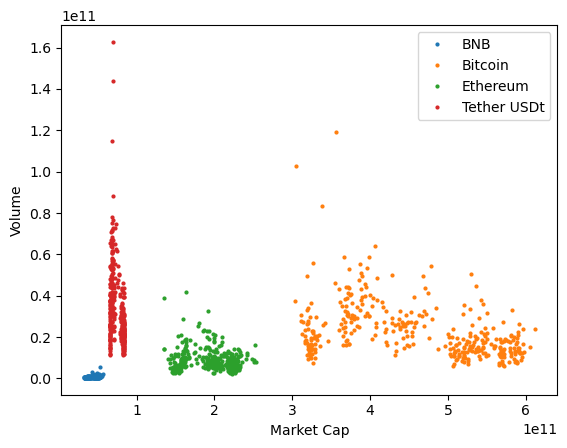

In [4]:
coins = df.groupby("name")
plt.margins(0.05)
for name, group in coins:
    plt.plot(
        group.market_cap,
        group.volume,
        marker='o',
        linestyle='',
        ms=2,
        label=name
    )
plt.legend()
plt.xlabel("Market Cap")
plt.ylabel("Volume")
plt.show()

## Visualizing Market Trends

Creating a scatter plot to visualize the relationship between market cap and volume, providing a clear picture of market.

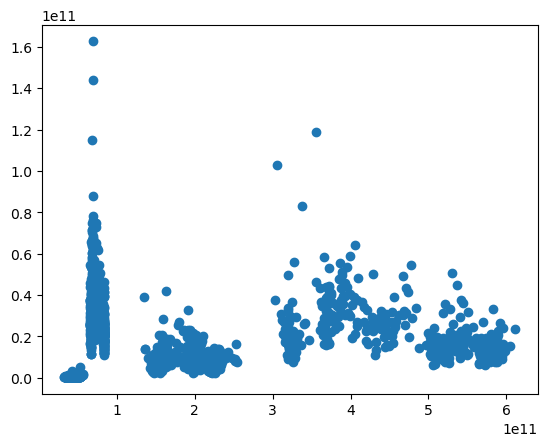

In [5]:
X = df[["market_cap", "volume"]]

plt.scatter(df["market_cap"], df["volume"])
plt.show()

## Exploring Data Clusters

Using K-means clustering to group data points and visualizing the clusters for first usage of K-means.

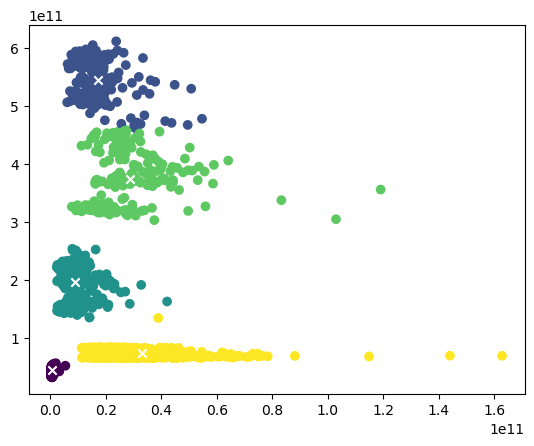

In [6]:
k_means_df = df[['volume', 'market_cap']].copy()

kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
kmeans.fit(k_means_df)
plt.scatter(
    k_means_df['volume'],
    k_means_df['market_cap'],
    c=kmeans.labels_
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color='White',
    marker='x'
)

plt.show()

## Exploring Data With Scaling
Applying Min-Max scaling to the data and performing K-means clustering, showcasing the impact of scaling on the clustering results.

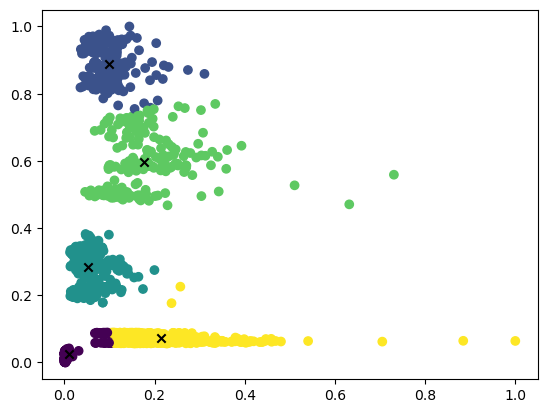

In [247]:
k_means_df = df[['volume', 'market_cap']].copy()

scaled_features = MinMaxScaler().fit_transform(k_means_df.values)
k_means_df = pd.DataFrame(
    scaled_features,
    index=k_means_df.index,
    columns=k_means_df.columns
)

kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
kmeans.fit(k_means_df)
plt.scatter(
    k_means_df['volume'],
    k_means_df['market_cap'],
    c=kmeans.labels_
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color='Black',
    marker='x'
)

plt.show()

## Determining Optimal Number of Clusters

Utilizing the Elbow method and Silhouette Score method to identify the optimal cluster number, suggesting 3 or 4 as the most suitable options.

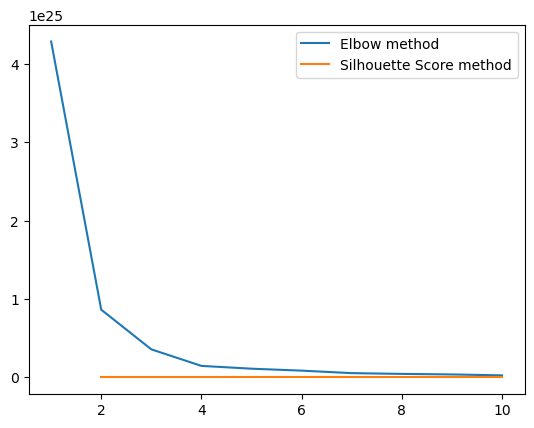

In [248]:
distorsions = []
s = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans.fit(X)
    
    distorsions.append(kmeans.inertia_)
    if i > 1:
        s.append(silhouette_score(X, kmeans.labels_, metric = "euclidean"))

plt.plot(range(1, 11), distorsions, label="Elbow method")
plt.plot(range(2, 11), s, label="Silhouette Score method")
plt.legend()
plt.show()

## Exploring Data with DBSCAN

Applying DBSCAN clustering with different parameters and visualizing clusters for in-depth data exploration.

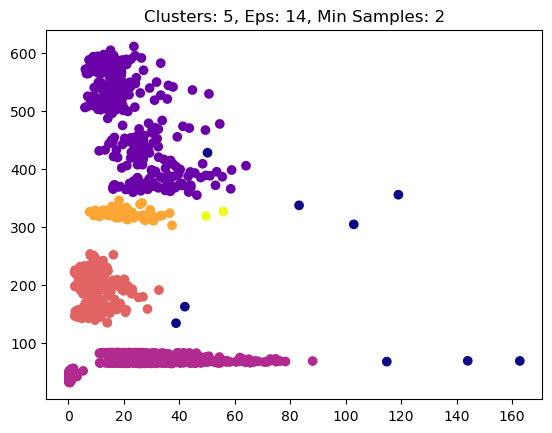

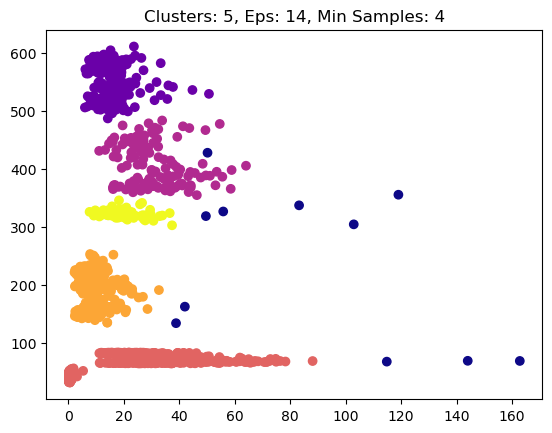

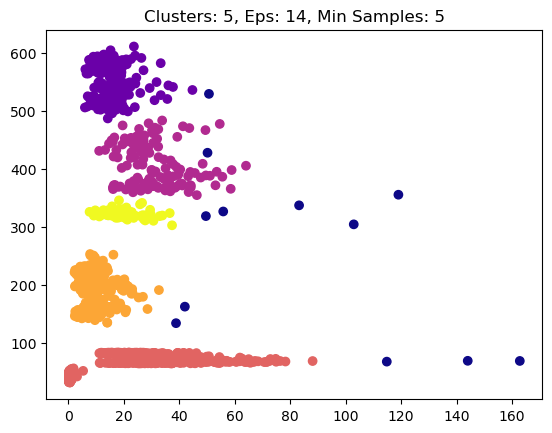

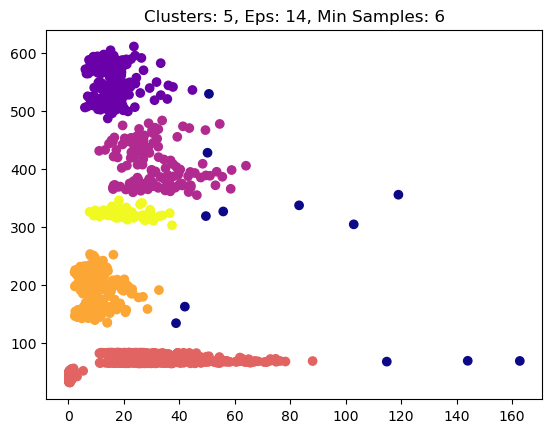

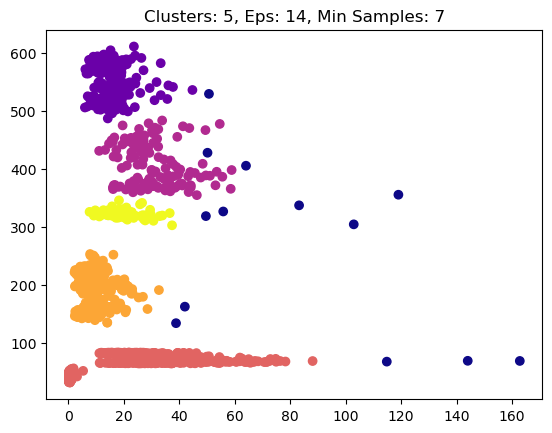

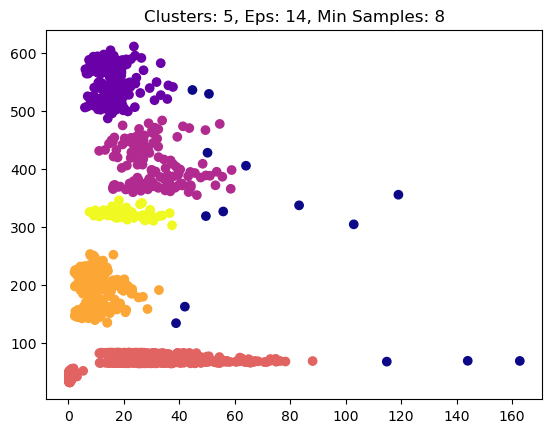

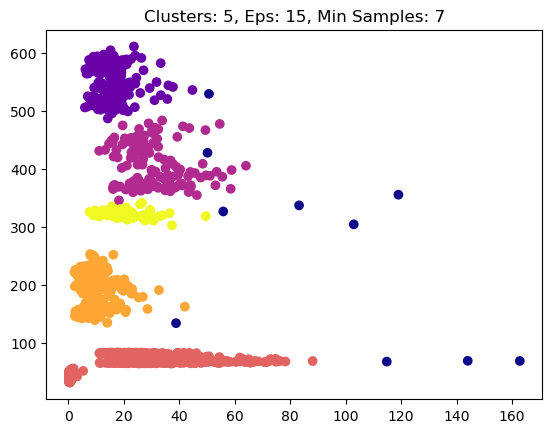

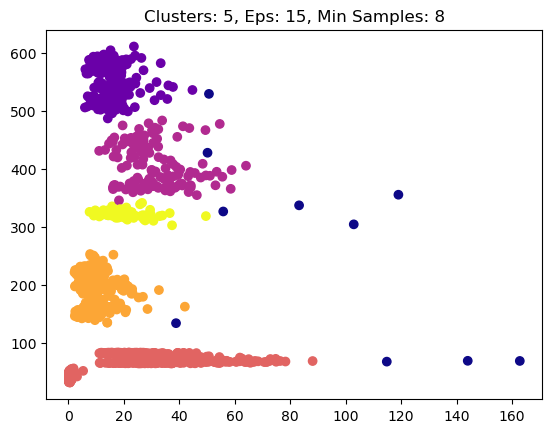

In [249]:
X_scale = X / 1e9

epsilons = [x for x in range(10, 16)]
min_samples = [2, 3, 4, 5, 6, 7, 8]

for eps in epsilons:
    for min_sample in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(X_scale)
        labels = dbscan.labels_
        cluster_number = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        outliers = list(labels).count(-1)
        if cluster_number == 5 and outliers < len(X_scale) / 10:
            plt.scatter(X_scale['volume'],
                        X_scale['market_cap'],
                        c=dbscan.labels_,
                        label=f'{eps},{min_sample}',
                        cmap='plasma'
                        )
            plt.title(f"Clusters: {cluster_number}, Eps: {eps}, Min Samples: {min_sample}")
            plt.show()